<a href="https://colab.research.google.com/github/Theshemmie/mllab/blob/main/Original_Product_Recommendation_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
# Load the dataset

BAA = pd.read_excel('/Users/5Y4R/Documents/Basket_Analysis_1.xlsx')

In [ ]:
# Display the first few rows of the dataset

BAA.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Feature Descriptions

BillNO : A 6 digit unique number assigned to each Transaction

Itemname : Name of the item purchased

Quantity : The quantity of each item being purchased

Date : Transcation Data

Price : Price of each Item

CustomerID: Unique Id of each customer

Country : The name of the country where each customer resides.

In [ ]:
##Check for the dimension of the data
BAA.shape

(522064, 7)

In [ ]:
# Check the data types of the columns

BAA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


In [ ]:
# Get summary statistics of the numerical columns

BAA.describe()

,Quantity,Price,CustomerID
count,522064.000000,522064.000000,388023.000000
mean,10.090435,3.826801,15316.931710
std,161.110525,41.900599,1721.846964
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13950.000000
50%,3.000000,2.080000,15265.000000
75%,10.000000,4.130000,16837.000000
max,80995.000000,13541.330000,18287.000000


In [ ]:
BAA[BAA['Quantity']<0]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
2359,536589,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4289,536764,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
6998,536996,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
6999,536997,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7000,536998,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...
515634,581210,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
515636,581212,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
515637,581213,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
517209,581226,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [ ]:
# Check for missing values in the dataset
missing_values = BAA.isnull().sum()

missing_values

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [ ]:
# Fill missing values in the CustomerID column with the mean value
BAA['CustomerID'].fillna(BAA['CustomerID'].mean(), inplace=True)

In [ ]:
# Fill missing values in the Quantity column with the mode
BAA['Itemname'].fillna(BAA['Itemname'].mode()[0], inplace=True)

In [ ]:
# Check for missing values in the dataset to be sure it has been handled
missing_values = BAA.isnull().sum()
print(BAA.columns)

Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country'],
      dtype='object')


In [ ]:
# Extract total price per transaction
BAA['TotalPrice'] = BAA['Quantity'] * BAA['Price']

In [ ]:
# Scale numerical features
scaler = StandardScaler()
BAA_scaled = scaler.fit_transform(BAA[['Quantity', 'Price', 'CustomerID', 'TotalPrice']])
BAA_scaled = pd.DataFrame(BAA_scaled, columns=['Quantity', 'Price', 'CustomerID', 'TotalPrice'])


In [ ]:
BAA_scaled.shape

(522064, 4)

In [ ]:
# Randomly sample a subset of the data
sample_size = 20000  # Adjust the sample size to 20000
BAA_sampled = BAA_scaled.sample(n=sample_size, random_state=42)

In [ ]:
##Data Sampling

# Randomly sample 1000 records from the dataset
sample_data = BAA.sample(n=1000, random_state=42)

# Display the sampled data
print(sample_data.head())


        BillNo                         Itemname  Quantity                Date  \
119187  546910          LUNCH BAG PINK POLKADOT         4 2011-03-17 19:46:00   
242102  559052          TEA PARTY BIRTHDAY CARD         2 2011-07-05 16:53:00   
234015  558370  DINOSAUR LUNCH BOX WITH CUTLERY         2 2011-06-28 15:44:00   
333818  567205          RED SPOT GIFT BAG LARGE        24 2011-09-19 10:44:00   
24571   538361            DAIRY MAID STRIPE MUG         4 2010-12-10 16:36:00   

        Price   CustomerID         Country  TotalPrice  
119187   1.65  13969.00000  United Kingdom        6.60  
242102   0.83  15316.93171  United Kingdom        1.66  
234015   2.55  17750.00000  United Kingdom        5.10  
333818   1.25  15365.00000  United Kingdom       30.00  
24571    2.95  17757.00000  United Kingdom       11.80  


# EDA

Text(0.5, 1.0, 'Quantity')

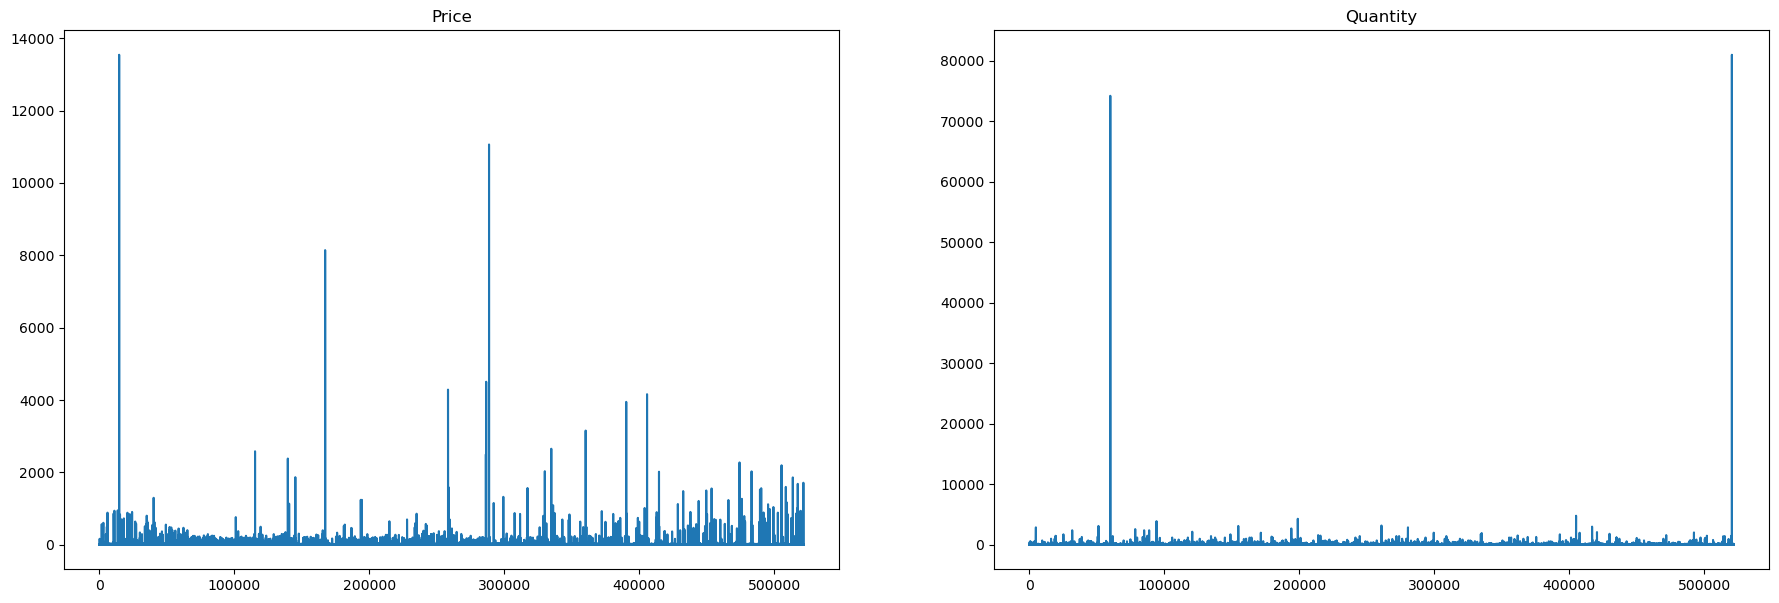

In [ ]:
#remove the rows which has the buyed quality is small or equal to zero
BAA=BAA[BAA['Quantity']>0]

#remove the rows which price is small or equal to zero
BAA=BAA[BAA['Price']>0]
BAA.shape

plt.figure(figsize=(22,7))
plt.subplot(1,2,1)
BAA.Price.plot()
plt.title("Price")
plt.subplot(1,2,2)
BAA.Quantity.plot()
plt.title("Quantity")

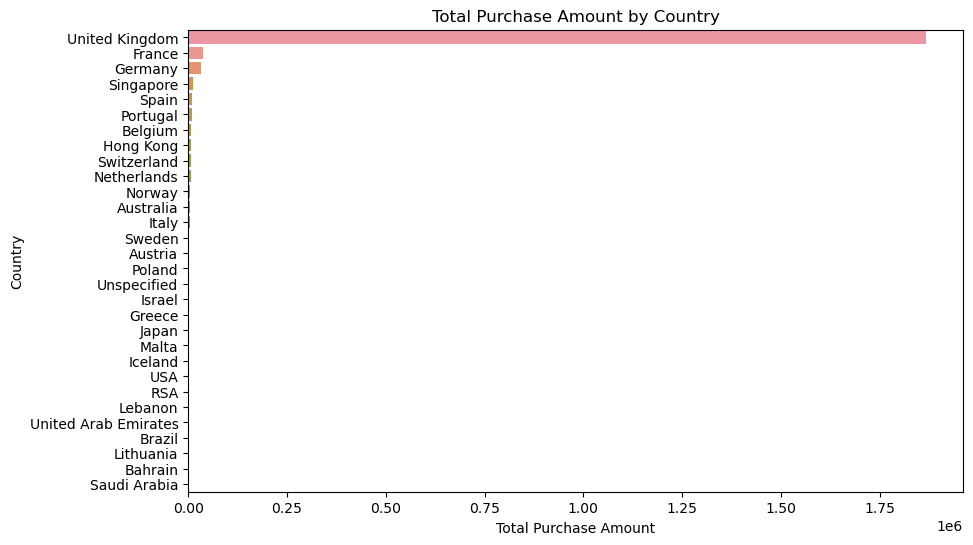

In [ ]:
# Country-wise total purchase amount
country_total = BAA.groupby('Country')['Price'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_total.values, y=country_total.index)
plt.title('Total Purchase Amount by Country')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Country')
plt.show()

In [ ]:
# Get the top 10 item names by count
top_10_items = BAA['Itemname'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 item names
BAE = BAA[BAA['Itemname'].isin(top_10_items)]

BAE

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,TotalPrice
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00000,United Kingdom,15.30
9,536367,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.00000,United Kingdom,54.08
49,536373,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.00000,United Kingdom,15.30
66,536375,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.00000,United Kingdom,15.30
93,536378,LUNCH BAG RED RETROSPOT,10,2010-12-01 09:37:00,1.65,14688.00000,United Kingdom,16.50
...,...,...,...,...,...,...,...,...
521695,581498,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,15316.93171,United Kingdom,20.65
521853,581538,LUNCH BAG BLACK SKULL.,1,2011-12-09 11:34:00,1.65,14446.00000,United Kingdom,1.65
521854,581538,LUNCH BAG RED RETROSPOT,1,2011-12-09 11:34:00,1.65,14446.00000,United Kingdom,1.65
522020,581583,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777.00000,United Kingdom,58.00


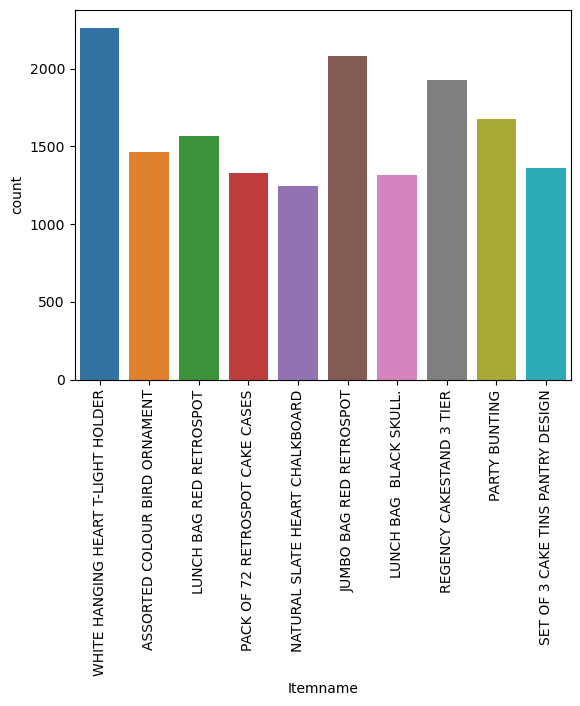

In [ ]:
# Create a countplot for the top 10 item names
ax = sns.countplot(data=BAE, x='Itemname')
plt.xticks(rotation=90)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'Netherlands'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Norway'),
  Text(6, 0, 'Switzerland'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'Portugal'),
  Text(9, 0, 'Belgium')])

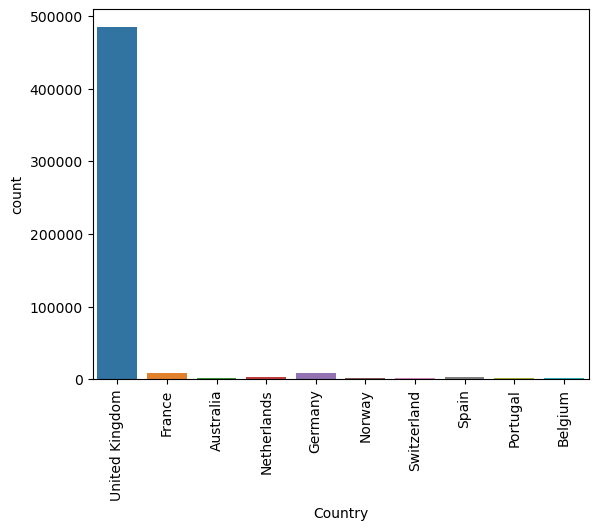

In [ ]:
# Get the top 5 country names by count
top_5_country = BAA['Country'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 item names
df_top_5 = BAA[BAA['Country'].isin(top_5_country)]

# Create a countplot for the top 10 item names
ax=sns.countplot(data=df_top_5, x='Country')
plt.xticks(rotation=90)

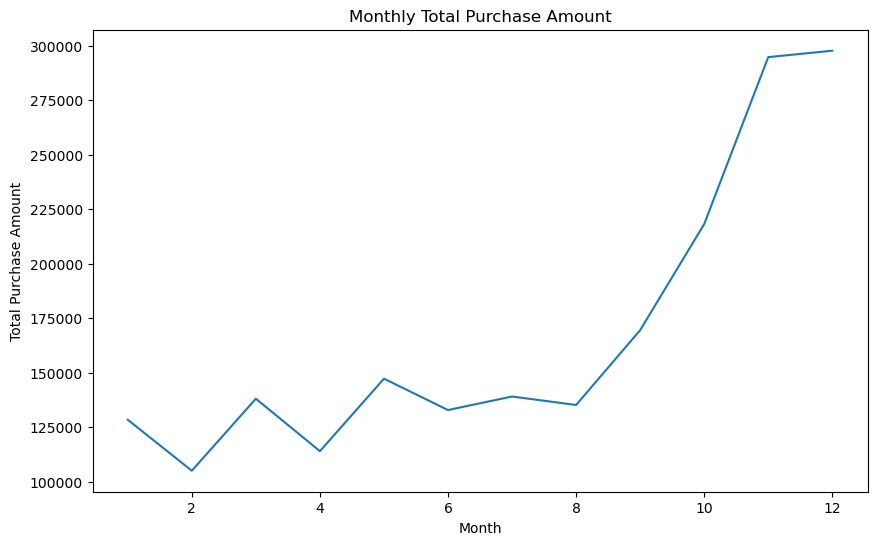

In [ ]:
# Monthly trend of total purchase amount
BAA['Date'] = pd.to_datetime(BAA['Date'])
BAA['Month'] = BAA['Date'].dt.month
monthly_total = BAA.groupby('Month')['Price'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_total.index, y=monthly_total.values)
plt.title('Monthly Total Purchase Amount')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount')
plt.show()

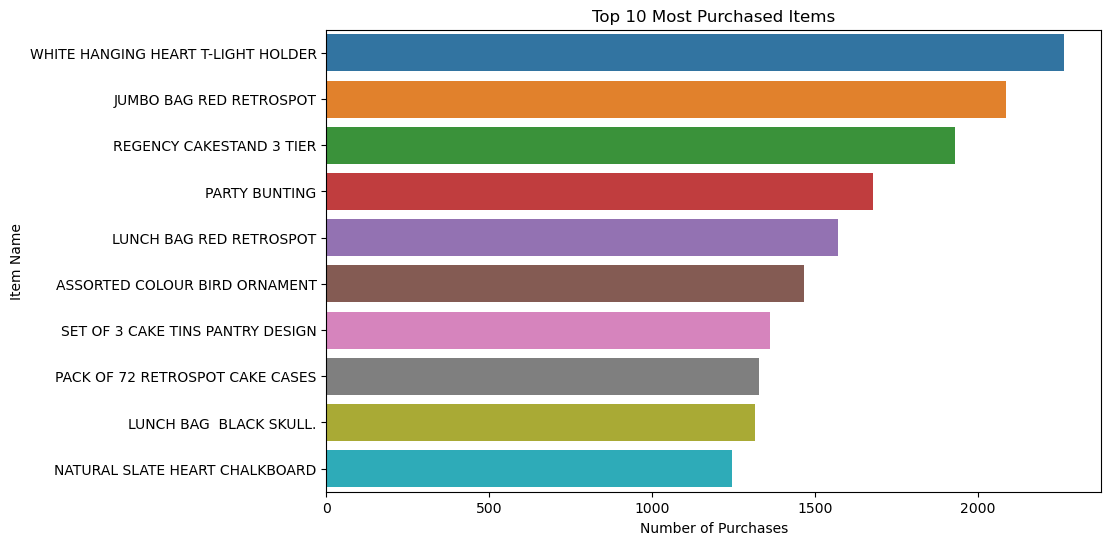

In [ ]:
# Top 10 most purchased items
top_10_items = BAA['Itemname'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_items.values, y=top_10_items.index)
plt.title('Top 10 Most Purchased Items')
plt.xlabel('Number of Purchases')
plt.ylabel('Item Name')
plt.show()

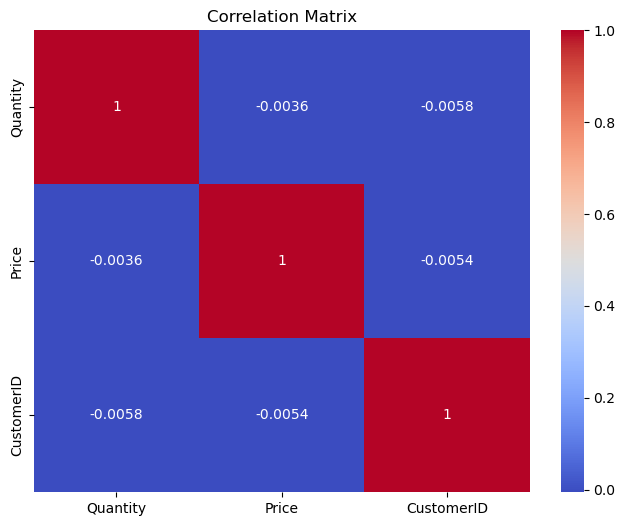

In [ ]:
# Visualize the correlation matrix of numerical variables
numeric_cols = ['Quantity', 'Price', 'CustomerID']
numeric_df = BAA[numeric_cols]
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans

# Set the number of clusters (number of customer segments)
num_clusters = 10

In [ ]:
# Perform K-means clustering on 'Price' column
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
BAA_sampled['Cluster'] = kmeans.fit_predict(BAA_sampled[['Price']])

# Calculate the cluster centers (average price in each cluster)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Cluster Center Price'])
cluster_centers['Cluster'] = cluster_centers.index

In [ ]:
# Display the cluster centers
print(cluster_centers)



   Cluster Center Price  Cluster
0             -0.053391        0
1             27.466058        1
2             61.572764        2
3             13.465386        3
4              7.163614        4
5              0.251252        5
6              3.001161        6
7             35.716306        7
8             20.840133        8
9              0.040361        9


In [ ]:
# Function to recommend top products for each cluster
def recommend_products(cluster_id, num_recommendations=5):
    cluster_data = BAA_sampled[BAA_sampled['Cluster'] == cluster_id]
    top_products = cluster_data.nlargest(num_recommendations, 'TotalPrice')
    return top_products



In [ ]:
# Recommendation for each cluster
num_recommendations = 5
for cluster_id in range(num_clusters):
    print(f"\nRecommendations for Cluster {cluster_id}:")
    recommendations = recommend_products(cluster_id, num_recommendations)
    # Get the indices of the top products
    top_product_indices = recommendations.index
    # Add 'Itemname', 'Price', and 'TotalPrice' columns back to the DataFrame
    recommendations_with_names = BAA.loc[top_product_indices, ['Itemname', 'Price', 'TotalPrice']]
    print(recommendations_with_names)



Recommendations for Cluster 0:
                                 Itemname  Price  TotalPrice
235569              REGENCY MILK JUG PINK   2.75     1914.00
369252               FELTCRAFT DOLL MOLLY   2.55     1836.00
195084           BLACK AND WHITE DOG BOWL   3.24     1788.48
366106            JUMBO BAG PINK POLKADOT   1.79     1253.00
180603  COLOUR GLASS. STAR T-LIGHT HOLDER   2.75     1177.00

Recommendations for Cluster 1:
              Itemname    Price  TotalPrice
292220  DOTCOM POSTAGE  1154.67     1154.67

Recommendations for Cluster 2:
       Itemname    Price  TotalPrice
115387   Manual  2583.76     2583.76

Recommendations for Cluster 3:
                              Itemname   Price  TotalPrice
214934  PICNIC BASKET WICKER 60 PIECES  649.50      649.50
375050                  DOTCOM POSTAGE  635.01      635.01
331242                  DOTCOM POSTAGE  594.00      594.00
360922                  DOTCOM POSTAGE  492.46      492.46
440289                  DOTCOM POSTAGE  469.20   


Recommendations for Cluster 0:
                                 Itemname  Price  TotalPrice
235569              REGENCY MILK JUG PINK   2.75     1914.00
369252               FELTCRAFT DOLL MOLLY   2.55     1836.00
195084           BLACK AND WHITE DOG BOWL   3.24     1788.48
366106            JUMBO BAG PINK POLKADOT   1.79     1253.00
180603  COLOUR GLASS. STAR T-LIGHT HOLDER   2.75     1177.00
429842    TRADITIONAL PICK UP STICKS GAME   2.95     1132.80
520251                     POPCORN HOLDER   0.72     1080.00
128250                 POTTING SHED TWINE   2.40     1036.80
272381    SMALL ZINC HEART WALL ORGANISER   3.32      996.00
293061                SAVE THE PLANET MUG   1.06      873.44


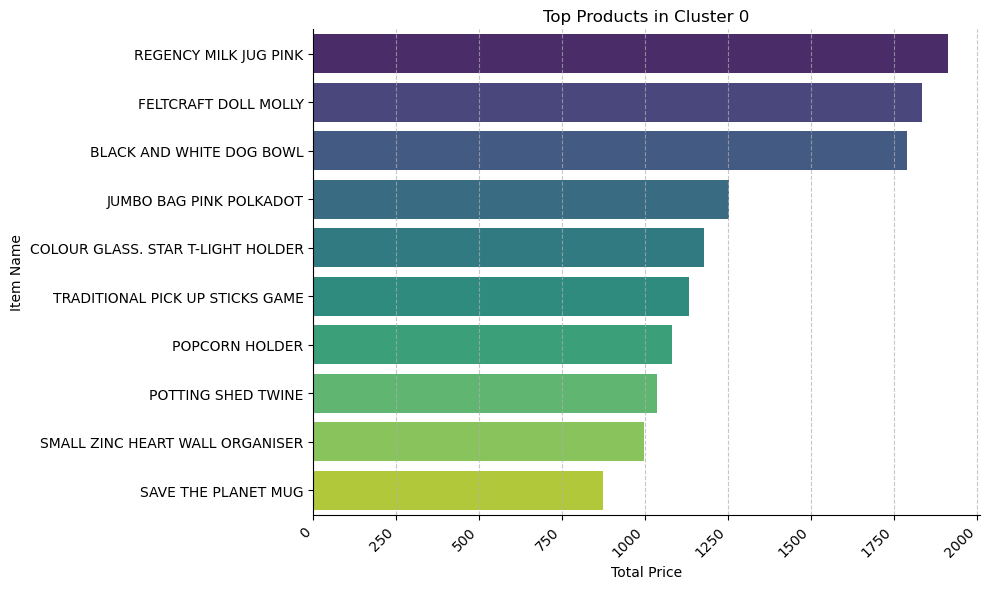


Recommendations for Cluster 1:
              Itemname    Price  TotalPrice
292220  DOTCOM POSTAGE  1154.67     1154.67


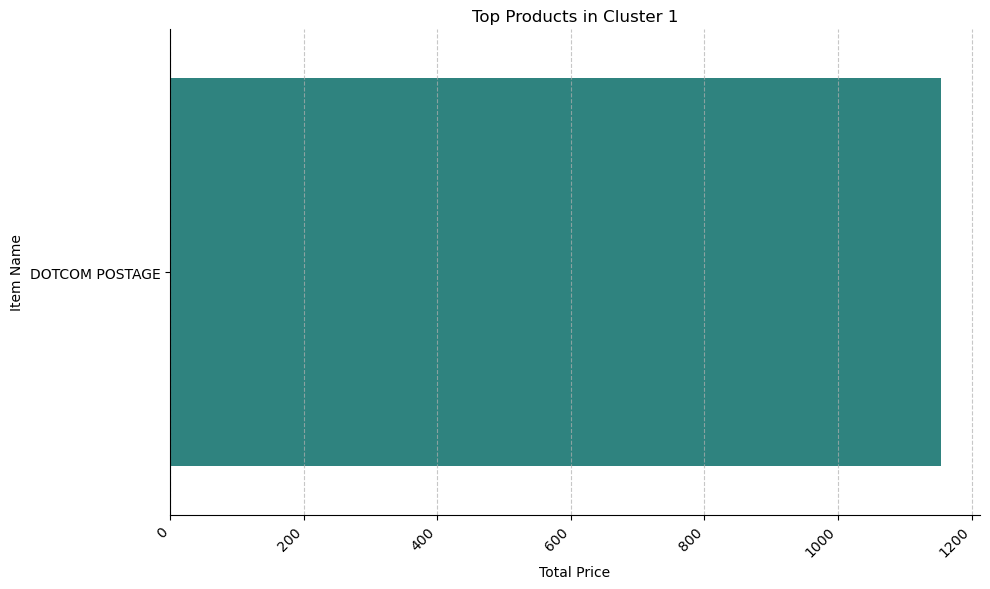


Recommendations for Cluster 2:
       Itemname    Price  TotalPrice
115387   Manual  2583.76     2583.76


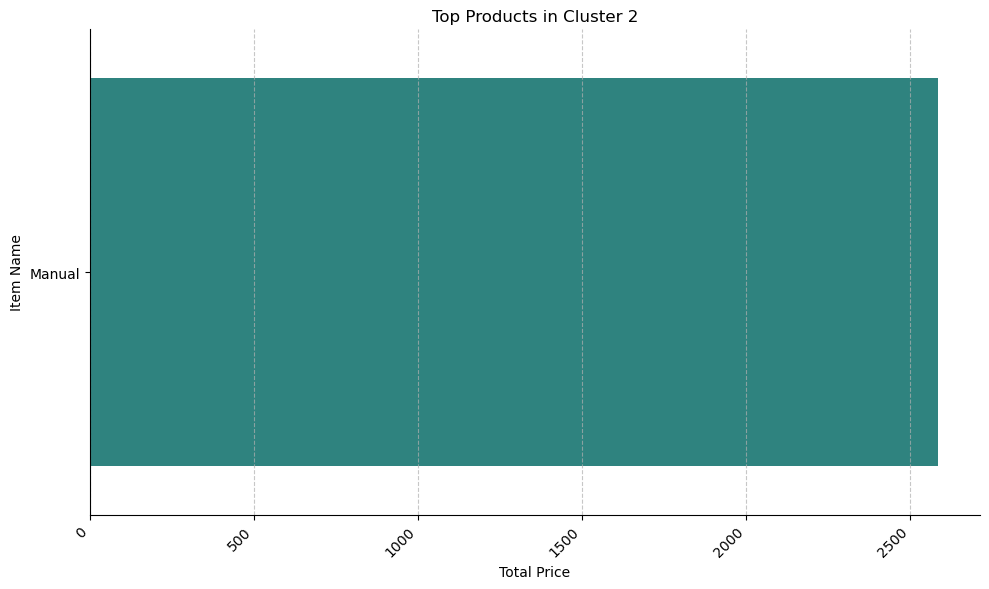


Recommendations for Cluster 3:
                              Itemname   Price  TotalPrice
214934  PICNIC BASKET WICKER 60 PIECES  649.50      649.50
375050                  DOTCOM POSTAGE  635.01      635.01
331242                  DOTCOM POSTAGE  594.00      594.00
360922                  DOTCOM POSTAGE  492.46      492.46
440289                  DOTCOM POSTAGE  469.20      469.20


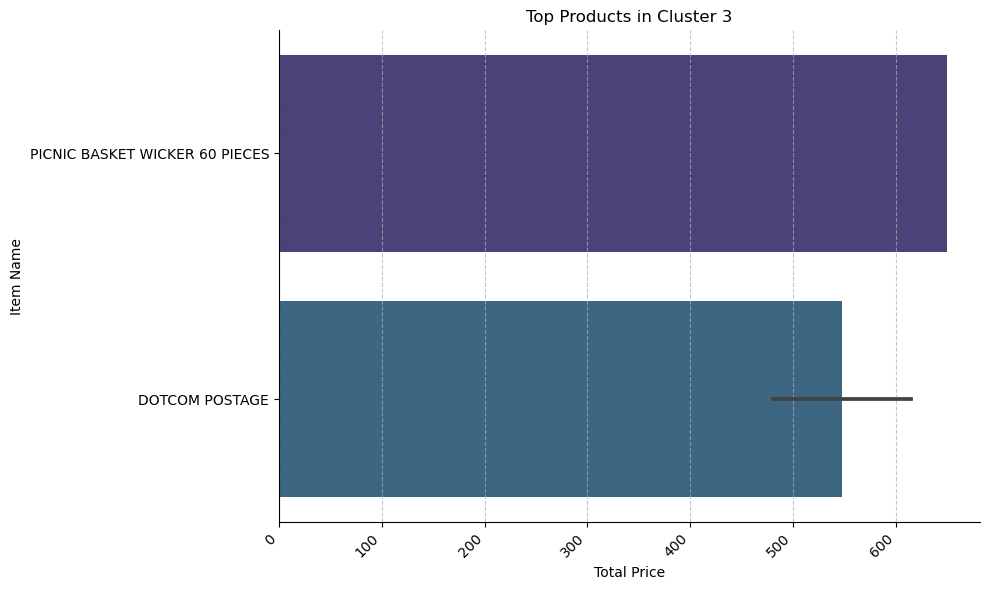


Recommendations for Cluster 4:
                            Itemname   Price  TotalPrice
54048                 DOTCOM POSTAGE  404.49      404.49
39461                 DOTCOM POSTAGE  324.43      324.43
247762                DOTCOM POSTAGE  319.82      319.82
59662                 DOTCOM POSTAGE  301.84      301.84
165262  VINTAGE BLUE KITCHEN CABINET  295.00      295.00
136256                DOTCOM POSTAGE  274.75      274.75
101654                DOTCOM POSTAGE  265.19      265.19
70626                 DOTCOM POSTAGE  246.37      246.37


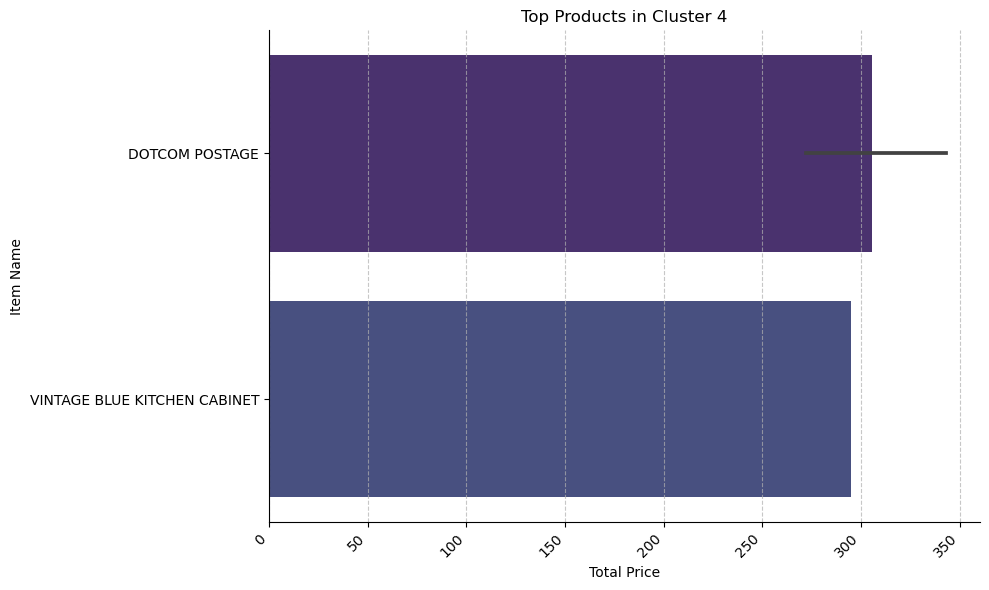


Recommendations for Cluster 5:
                          Itemname  Price  TotalPrice
20035    UTILTY CABINET WITH HOOKS  19.94     1914.24
363628    REGENCY CAKESTAND 3 TIER  10.95     1314.00
247421               PARTY BUNTING  10.79      636.61
461455    REGENCY CAKESTAND 3 TIER  10.95      613.20
299529              SPOTTY BUNTING  10.79      517.92
178715    REGENCY CAKESTAND 3 TIER  10.95      394.20
515217    REGENCY CAKESTAND 3 TIER  10.95      350.40
17205   VICTORIAN SEWING BOX LARGE  10.95      350.40
220334    REGENCY CAKESTAND 3 TIER  10.95      350.40
119535     FUSCHIA RETRO BAR STOOL  35.95      323.55


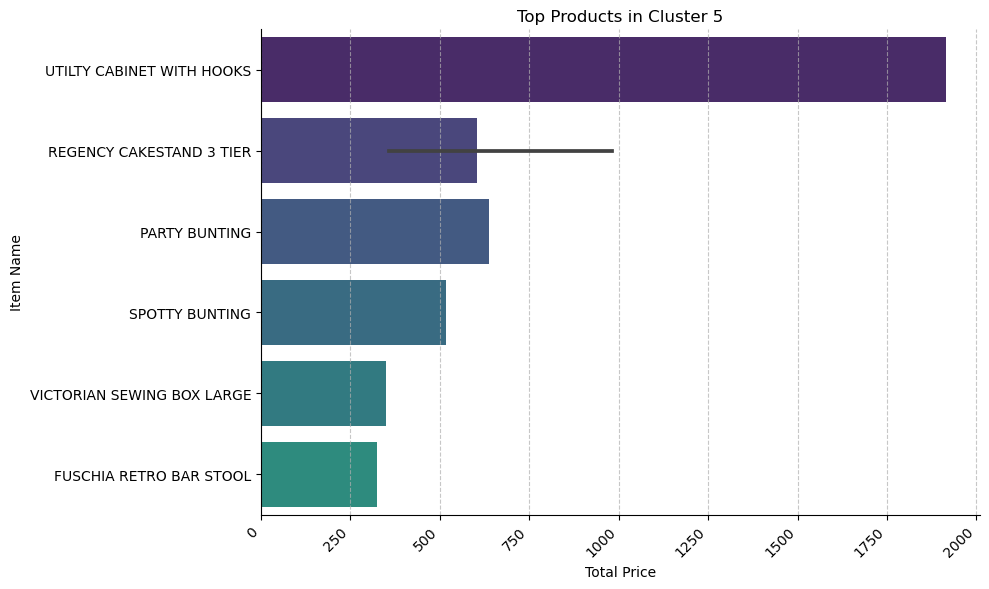


Recommendations for Cluster 6:
                            Itemname   Price  TotalPrice
283856                DOTCOM POSTAGE  203.63      203.63
142741                DOTCOM POSTAGE  187.21      187.21
141733                DOTCOM POSTAGE  185.28      185.28
306529                DOTCOM POSTAGE  176.72      176.72
109166  VINTAGE BLUE KITCHEN CABINET  125.00      125.00
310103                DOTCOM POSTAGE  119.77      119.77
185480                DOTCOM POSTAGE  113.99      113.99
29932                 DOTCOM POSTAGE  113.45      113.45
177370                DOTCOM POSTAGE  109.25      109.25
39604                 DOTCOM POSTAGE  103.57      103.57


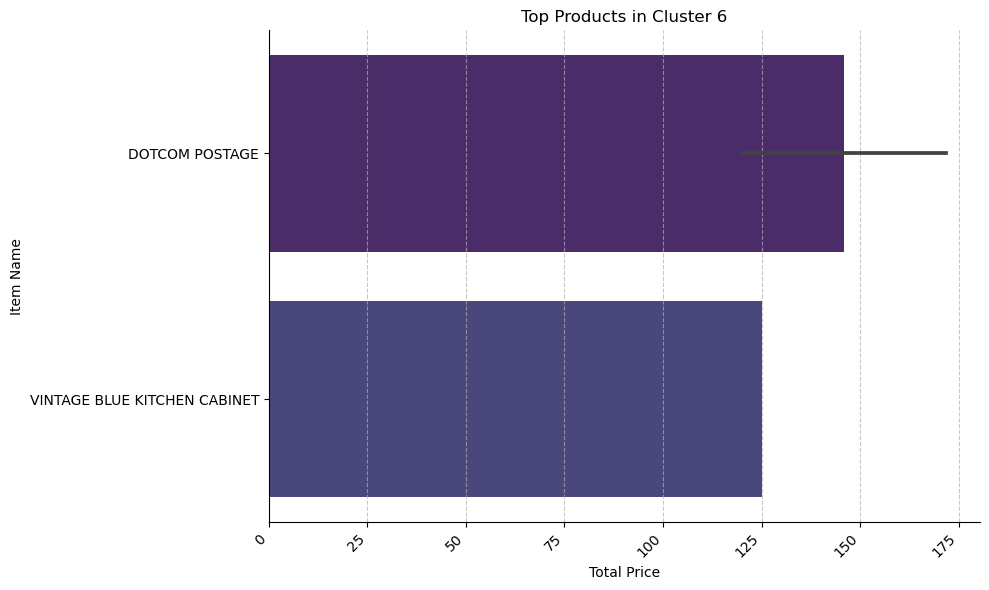


Recommendations for Cluster 7:
              Itemname    Price  TotalPrice
449733  DOTCOM POSTAGE  1500.36     1500.36


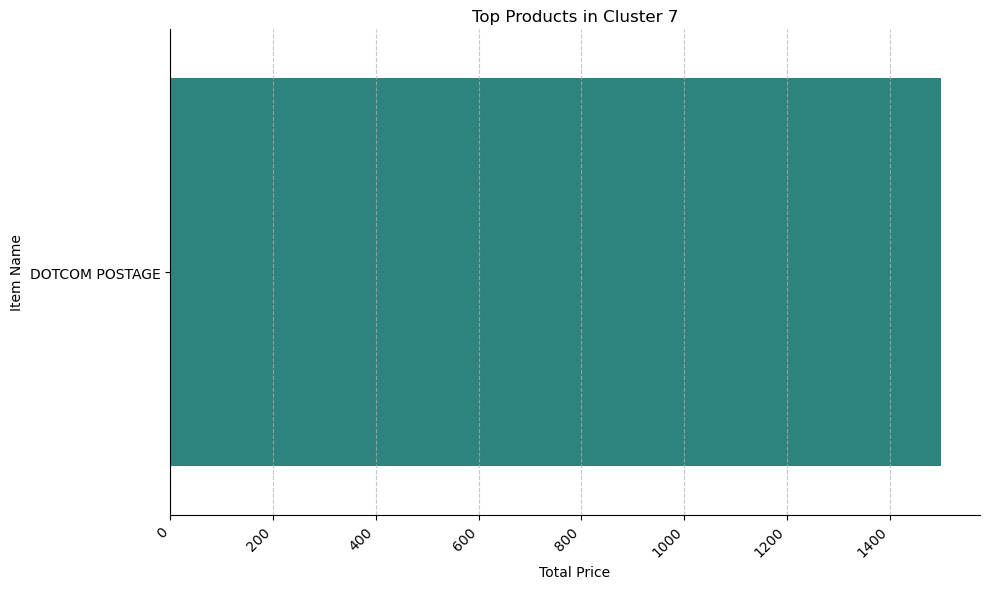


Recommendations for Cluster 8:
              Itemname   Price  TotalPrice
307730  DOTCOM POSTAGE  877.04      877.04


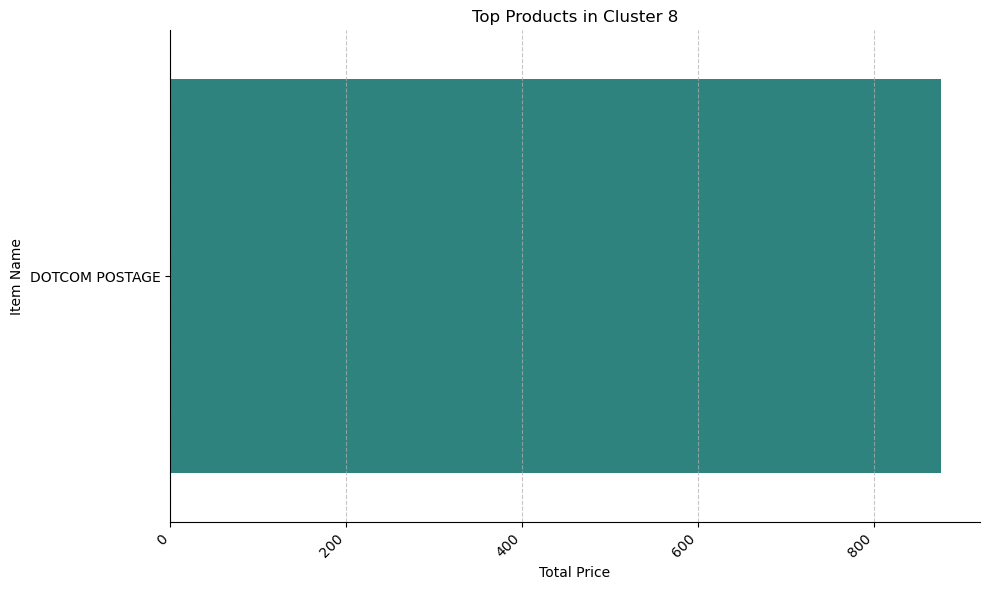


Recommendations for Cluster 9:
                                   Itemname  Price  TotalPrice
330236                   DOORMAT FAIRY CAKE   4.58     2290.00
191899           PICNIC BASKET WICKER LARGE   8.50     1700.00
213823    DOORMAT UNION JACK GUNS AND ROSES   4.58     1374.00
364076                VILLAGE SHOW WALL ART   5.35      963.00
238863   DOORMAT FANCY FONT HOME SWEET HOME   4.58      916.00
209656                   DOORMAT UNION FLAG   4.58      916.00
330252   DOORMAT FANCY FONT HOME SWEET HOME   4.58      916.00
429840          VINTAGE DOILY JUMBO BAG RED   4.95      727.65
394843  CHRISTMAS LIGHTS 10 VINTAGE BAUBLES   4.95      712.80
224623                        PARTY BUNTING   4.15      622.50


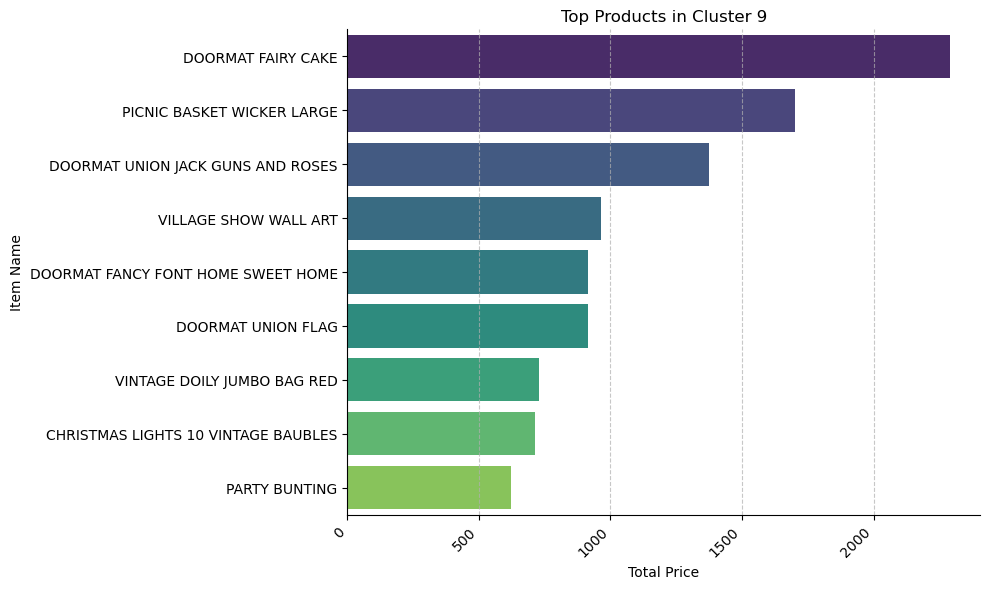

In [ ]:
# Function to recommend top products for each cluster
def recommend_products(cluster_id, num_recommendations=5):
    cluster_data = BAA_sampled[BAA_sampled['Cluster'] == cluster_id]
    top_products = cluster_data.nlargest(num_recommendations, 'TotalPrice')
    return top_products

# Recommendation for each cluster
num_recommendations = 10
for cluster_id in range(num_clusters):
    print(f"\nRecommendations for Cluster {cluster_id}:")
    recommendations = recommend_products(cluster_id, num_recommendations)
    # Get the indices of the top products
    top_product_indices = recommendations.index
    # Add 'Itemname', 'Price', and 'TotalPrice' columns back to the DataFrame
    recommendations_with_names = BAA.loc[top_product_indices, ['Itemname', 'Price', 'TotalPrice']]
    print(recommendations_with_names)

    # Generate bar plot for each cluster
    plt.figure(figsize=(10, 6))
    colors = sns.color_palette('viridis', n_colors=len(recommendations_with_names))
    sns.barplot(x='TotalPrice', y='Itemname', data=recommendations_with_names, palette=colors)
    plt.xlabel('Total Price')
    plt.ylabel('Item Name')
    plt.title(f'Top Products in Cluster {cluster_id}')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Fit K-means clustering with the optimal number of clusters
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
BAA_sampled['Cluster'] = kmeans.fit_predict(BAA_sampled[['Price']])

# Calculate the Silhouette score for the clustering
silhouette_avg = silhouette_score(BAA_sampled[['Price']], BAA_sampled['Cluster'])

# Calculate the Calinski-Harabasz Index for the clustering
calinski_score = calinski_harabasz_score(BAA_sampled[['Price']], BAA_sampled['Cluster'])

print(f"Silhouette score for K-means clustering: {silhouette_avg:.3f}")
print(f"Calinski-Harabasz Index for K-means clustering: {calinski_score:.3f}")

Silhouette score for K-means clustering: 0.987
Calinski-Harabasz Index for K-means clustering: 113798.808


### The Silhouette score ranges from -1 to 1. A score closer to 1 indicates better-defined clusters.
### The Calinski-Harabasz Index is a metric used to evaluate the quality of clusters created by the K-means clustering algorithm. A higher value of the Calinski-Harabasz Index indicates better-defined and well-separated clusters
#### A positive score indicates that the objects in each cluster are well-matched to their cluster and poorly-matched to other clusters.
#### In our case, a positive Silhouette score(0.987) indicates that K-means clustering has formed reasonably well-defined clusters for product recommendations based on the 'Price' feature.
#### In your case, a Calinski-Harabasz Index of 113798.808 suggests that the clusters generated by the K-means algorithm exhibit a high degree of separation and coherence, indicating that the clustering has been effective in grouping the data points into distinct and meaningful clusters. This index provides understanding into the quality and appropriateness of the clusters formed by the algorithm

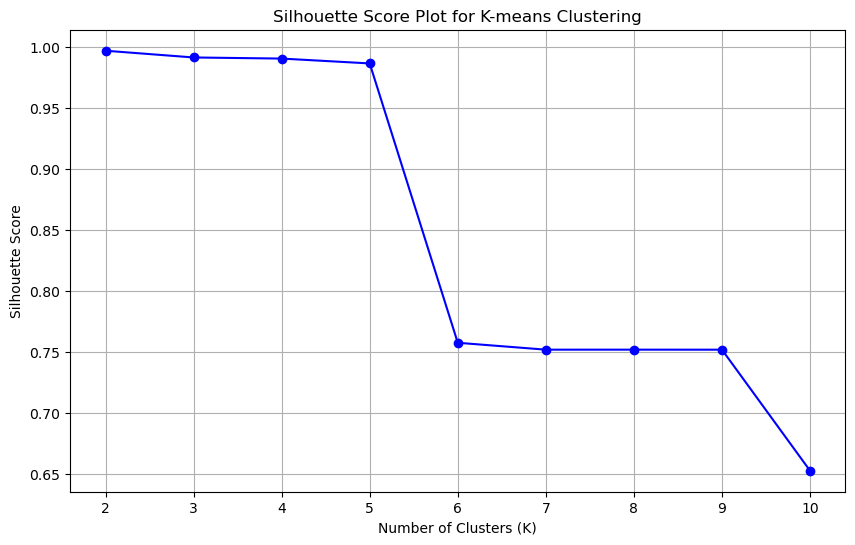

In [ ]:
# Function to calculate Silhouette score for a given 'K'
def get_silhouette_score(k, data):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    return silhouette_avg

# Range of 'K' values to try
k_values = range(2, 11)

# List to store the silhouette scores for each 'K'
silhouette_scores = []

# Calculate Silhouette scores for each 'K'
for k in k_values:
    score = get_silhouette_score(k, BAA_sampled[['Price']])
    silhouette_scores.append(score)

# Plot the Silhouette Score Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Plot for K-means Clustering')
plt.grid(True)
plt.show()


The plot shows a curve representing the Silhouette scores for different 'K' values. The highest point on the curve which is at 2 indicates the optimal number of clusters.

Based on the Silhouette Score Plot, it appears that the highest Silhouette score is achieved when the number of clusters 'K' is set to 2. The silhouette score at this point indicates that the clustering with 2 clusters is the most effective in terms of how well-separated the data points are within their respective clusters and how well they are distinct from the other clusters.
The Silhouette Score Plot shows a curve representing the Silhouette scores for different 'K' values.
The highest point on the curve is achieved when 'K' is set to 2, where the Silhouette score is 0.99. This indicates that the clustering with 2 clusters is the most effective in terms of how well-separated the data points are within their respective clusters and how well they are distinct from the other clusters.
A Silhouette score of 0.99 at 'K' = 2 suggests that the data points are exceptionally well-clustered into two distinct groups based on the 'Price' feature. The high Silhouette score indicates that the clusters are compact and well-separated, with minimal overlap between them.
Additionally, when 'K' is set to 5, the Silhouette score is 0.987. This indicates that the clustering with 5 clusters is also very effective in terms of how well-separated the data points are within their respective clusters.
The Silhouette score of 0.987 for 'K' = 5 suggests that the data points are well-clustered into five distinct groups based on the 'Price' feature. The clusters are compact, and there is minimal overlap between them, contributing to the high Silhouette score.
In summary, based on the Silhouette Score Plot, both 'K' = 2 and 'K' = 5 seem to be valid choices for the number of clusters. Both options achieve very high Silhouette scores, indicating well-defined and well-separated clusters based on the 'Price' feature. Having fewer clusters with 'K' = 2 may provide a more straightforward and clear separation, while 'K' = 5 would allow for a more fine-grained clustering with slightly more distinct groups.

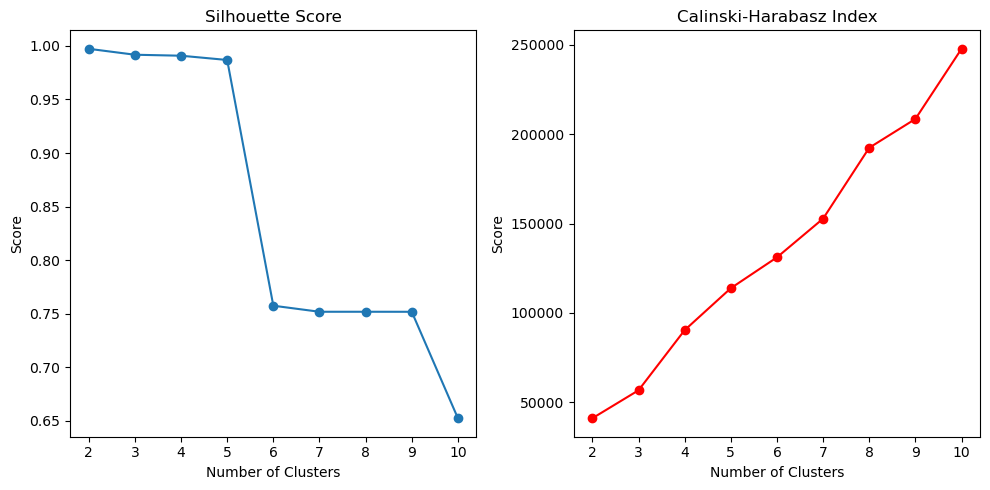

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans

# Data preparation and K-means fitting
num_clusters_range = range(2, 11)  # Vary the number of clusters from 2 to 10
silhouette_scores = []
calinski_scores = []

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    BAA_sampled['Cluster'] = kmeans.fit_predict(BAA_sampled[['Price']])

    silhouette_avg = silhouette_score(BAA_sampled[['Price']], BAA_sampled['Cluster'])
    calinski_score = calinski_harabasz_score(BAA_sampled[['Price']], BAA_sampled['Cluster'])

    silhouette_scores.append(silhouette_avg)
    calinski_scores.append(calinski_score)

# Plotting
plt.figure(figsize=(10, 5))

# Plot Silhouette Score
plt.subplot(1, 2, 1)
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

# Plot Calinski-Harabasz Score
plt.subplot(1, 2, 2)
plt.plot(num_clusters_range, calinski_scores, marker='o', color='r')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()
